# day06_02_pandas

In [1]:
import numpy as np
import pandas as pd

In [20]:
a = {'good':['oneday','oneday'],'lval':[2000,2500]}
left = pd.DataFrame(a)
left

,good,lval
0,oneday,2000
1,oneday,2500


In [21]:
a = {'good':['oneday','oneday'],'rval':[4,5]}
right = pd.DataFrame(a)
right

,good,rval
0,oneday,4
1,oneday,5


### join: 데이터 합치기

* lval:가격
* rval:갯수

In [22]:
pd.merge(left,right, on = 'good')

,good,lval,rval
0,oneday,2000,4
1,oneday,2000,5
2,oneday,2500,4
3,oneday,2500,5


In [23]:
# left 1행을 bigdata 변경하기
left.loc[1,'good'] = 'bigdata'
left

,good,lval
0,oneday,2000
1,bigdata,2500


In [24]:
# right 1행을 bigdata 변경하기
right.loc[1,'good'] = 'bigdata'
right

,good,rval
0,oneday,4
1,bigdata,5


In [25]:
pd.merge(left,right, on = 'good')

,good,lval,rval
0,oneday,2000,4
1,bigdata,2500,5


### grouping 예제

In [27]:
#데이터 불러오기
#pd.read_csv(절대경로)
df2 = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/pandas/my_data_02.csv')
df2

,A,B,C,D
0,foo,one,-0.272853,0.445702
1,bar,one,-0.942053,-1.546124
2,foo,two,1.163523,1.230163
3,bar,three,-0.428761,0.325022
4,foo,two,1.188806,2.189103
5,bar,two,-1.320671,-1.510452
6,foo,one,-1.729539,1.112231
7,foo,three,1.403014,0.256193


In [29]:
#상위 5개 데이터 확인하기
df2.head()

,A,B,C,D
0,foo,one,-0.272853,0.445702
1,bar,one,-0.942053,-1.546124
2,foo,two,1.163523,1.230163
3,bar,three,-0.428761,0.325022
4,foo,two,1.188806,2.189103


In [31]:
#하위 5개 데이터 확인하기
df2.tail()

,A,B,C,D
3,bar,three,-0.428761,0.325022
4,foo,two,1.188806,2.189103
5,bar,two,-1.320671,-1.510452
6,foo,one,-1.729539,1.112231
7,foo,three,1.403014,0.256193


In [33]:
#A열을 그룹화하여 합계 구하기
df2.groupby('A').sum()

,C,D
A,,
bar,-2.691485,-2.731554
foo,1.752951,5.233392


In [35]:
# B열을 그룹화하여 총합 구하기
df2.groupby('B').sum()

,C,D
B,,
one,-2.944445,0.011809
three,0.974253,0.581215
two,1.031658,1.908814


In [39]:
#A열 대그룹의 B열 소그룹을 그룹화하여 총합구하기
df2.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.942053 -1.546124
    three -0.428761  0.325022
    two   -1.320671 -1.510452
foo one   -2.002392  1.557933
    three  1.403014  0.256193
    two    2.352329  3.419265

## 시계열


In [42]:
# samsung.csv 데이터 삼성 변수 저장
samsung = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/pandas/samsung.csv')
samsung

,basic_date,close_value
0,01/04/2000,203500
1,01/05/2000,175000
2,01/06/2000,176000
3,01/07/2000,172500
4,01/10/2000,178000
...,...,...
4066,12/23/2016,1396000
4067,12/26/2016,1409000
4068,12/27/2016,1428000
4069,12/28/2016,1424000


<AxesSubplot:xlabel='basic_date'>

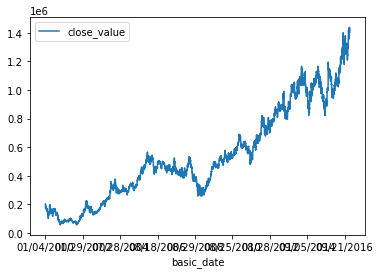

In [51]:
samsung.plot()

In [50]:
# samsung 데이터 이용하여 x축이 시간의 흐름을 보일 수 있도록 시각화 해주세요
samsung.index = samsung.basic_date

In [54]:
import datetime

### 실력확인

In [56]:
lib = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/pandas/my_lib_pandas.csv')
lib.head()

,도서관명,시도명,시군구명,열람좌석수,자료수
0,강북문화정보도서관,서울특별시,강북구,282,197717
1,강북청소년문화정보도서관,서울특별시,강북구,154,41010
2,솔샘문화정보도서관,서울특별시,강북구,132,53612
3,송중문화정보도서관,서울특별시,강북구,67,27916
4,수유문화정보도서관,서울특별시,강북구,152,36361


In [59]:
lib.shape

(99, 5)

In [61]:
 #자료수의 총 합계
lib['자료수'].sum()

8335167

In [88]:
# 열람 좌석수가 평균 이상인 도서관을 조회해주세요
a = lib['열람좌석수'] >= lib['열람좌석수'].mean()
lib.loc[a,:]

,도서관명,시도명,시군구명,열람좌석수,자료수
0,강북문화정보도서관,서울특별시,강북구,282,197717
7,서초구립반포도서관,서울특별시,서초구,580,145516
22,금산인삼고을도서관,충청남도,금산군,300,62639
30,동구도서관,부산광역시,동구,440,10
33,교육문화관,강원도,삼척시,578,181428
35,부산광역시립중앙도서관,부산광역시,중구,883,292285
36,부산광역시립중앙도서관 수정분관,부산광역시,동구,307,98420
38,부산광역시립구포도서관,부산광역시,북구,1543,298184
39,부산광역시립해운대도서관,부산광역시,해운대구,967,208008
41,부산광역시립시민도서관,부산광역시,부산진구,2232,743158


In [67]:
 #시도명이 서울특별시인 도서관만 조회
b = lib['시도명'] == '서울특별시'
lib.loc[b,'도서관명']

0        강북문화정보도서관
1     강북청소년문화정보도서관
2        솔샘문화정보도서관
3        송중문화정보도서관
4        수유문화정보도서관
5        미아문화정보도서관
6        삼각산어린이도서관
7        서초구립반포도서관
8        서초구립내곡도서관
9            서이도서관
10           잠원도서관
11           방배도서관
12        서초그림책도서관
Name: 도서관명, dtype: object

In [93]:
# 열람좌석수가 평균 이상인 도서관 중에서 시도명이 경기도인 데이터만 조회하기
a = lib['열람좌석수'] >= lib['열람좌석수'].mean()
b = lib['시도명'] == '경기도'
lib.loc[a&b,:]

,도서관명,시도명,시군구명,열람좌석수,자료수
52,교문도서관,경기도,구리시,458,167982
53,인창도서관,경기도,구리시,527,230790
54,토평도서관,경기도,구리시,571,151299
59,수정도서관,경기도,성남시,573,321293
60,중원도서관,경기도,성남시,2000,334102
62,판교도서관,경기도,성남시,523,189297
63,판교어린이도서관,경기도,성남시,406,76699
64,중원어린이도서관,경기도,성남시,708,115782
65,해오름도서관,경기도,성남시,717,372493
66,분당도서관,경기도,성남시,802,321822


In [101]:
#시도명 그룹의 열람좌석수와 자료수의 합계를 구하시오
a = lib.groupby('시도명').sum()

In [104]:
#시도명 그룹의 열람좌석수 합계
a.drop('자료수',axis=1)
lib.groupby('시도명').sum().loc[:,'열람좌석수']

시도명
강원도        853
경기도      11624
경상남도       206
부산광역시     9133
서울특별시     2219
전라남도       302
전라북도      2413
충청남도       700
Name: 열람좌석수, dtype: int64

In [109]:
#정렬하기
lib.groupby('시도명').sum().sort_values(by=['열람좌석수'])
lib.groupby('시도명').sum().sort_values(by=['열람좌석수'], ascending = False)

,열람좌석수,자료수
시도명,,
경기도,11624,3406237
부산광역시,9133,3038381
전라북도,2413,531985
서울특별시,2219,631325
강원도,853,329060
충청남도,700,212284
전라남도,302,112362
경상남도,206,73533


In [113]:
lib.groupby(['시도명','시군구명']).sum().sort_values(['시도명','자료수'])

열람좌석수      자료수
시도명   시군구명                
강원도   삼척시     853   329060
경기도   동두천시    646   366844
      구리시    1680   607816
      성남시    9298  2431577
경상남도  김해시     206    73533
부산광역시 동구      747    98430
      연제구     330   111378
      금정구     245   143500
      서구      290   151158
      사하구     332   167486
      동래구     281   190661
      중구      883   292285
      북구     1543   298184
      해운대구   1549   516643
      부산진구   2933  1068656
서울특별시 서초구    1110   227189
      강북구    1109   404136
전라남도  곡성군     152    52875
      무안군     150    59487
전라북도  임실군     250    94787
      군산시    2163   437198
충청남도  금산군     700   212284